In [1]:
import pandas as pd
import numpy as np
from benchmarks import *
import glob
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
from tqdm.notebook import tqdm

ROOT_DIR /usr/WS2/bolet1/ruby-benchmarks/exploreGlobalOptimizations


In [4]:

def makePlotForMachine(MACHINE):
	global ROOT_DIR
	
	if not (MACHINE in ROOT_DIR):
		othermachine = 'lassen' if MACHINE == 'ruby' else 'ruby'
		ROOT_DIR = ROOT_DIR.replace(othermachine, MACHINE)

	print(MACHINE, ROOT_DIR)

	# open up the database
	dbFile = f'{MACHINE}-fullExploreDataset.csv'
	df = pd.read_csv(ROOT_DIR+'/databases/'+dbFile)

	df = df[df['progname'] != 'bfs_rodinia']

	numthreads = 160 if MACHINE == 'lassen' else 112

	# select the baseline xtimes
	baselines = df[(df['OMP_NUM_THREADS'] == numthreads) & 
								 (df['OMP_PROC_BIND'] == 'close') &
								 (df['OMP_PLACES'] == 'threads') &
								 (df['OMP_SCHEDULE'] == 'static')].reset_index()


	#print(baselines.shape)
	print('baselines', baselines)

	# select the optimal xtimes
	grouped = df.groupby(['progname', 'probsize'])

	bestRuns = grouped['xtime'].min().reset_index()

	#print(bestRuns.shape)
	print(bestRuns, df.loc[grouped['xtime'].idxmin()], sep='\n\n')


	# take the ratio of the baseline and the best runs
	bestRuns['speedup'] = baselines['xtime']/bestRuns['xtime']

	g = sns.catplot(x='progname', y='speedup', hue='probsize', 
									hue_order=['smlprob', 'medprob', 'lrgprob'], data=bestRuns, kind='bar', 
									legend_out=False, height=5, aspect=1.5)

	g.fig.subplots_adjust(top=0.85)
	cpu = 'Intel' if MACHINE == 'ruby' else 'Power9'
	g.fig.suptitle(f'Optimal OMP Configuration Speedup for each Benchmark ({cpu})')

	ax = g.axes.flatten()[0]
	ax.axhline(y=1.0, zorder=0, ls='--', c='red')
	ax.set_xlabel('Program Name')
	ax.set_ylabel('Speedup from Baseline')
	fontsize = 7
	ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge',fontsize=fontsize)
	ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge',fontsize=fontsize)
	ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge',fontsize=fontsize)

	plt.show()


	#g = sns.FacetGrid(grouped, col='probsize', col_order=probsizes, hue=colToPlot, palette='flare', legend_out=True, height=5, aspect=1.5)
	#g.map_dataframe(sns.lineplot, x='globalSample', y='runIndic')
	#g.add_legend()
	#g.set(ylim=(-0.05, 100.05))
	#g.fig.subplots_adjust(top=0.85)
	#g.fig.suptitle(f'{progname} -- {method.upper()} -- sweep "{colToPlot}" hyperparam')
	return	

ruby /usr/WS2/bolet1/ruby-benchmarks/exploreGlobalOptimizations
    index     progname probsize  OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES   
0    1246       bt_nas  lrgprob              112         close    threads  \
1    2566       bt_nas  medprob              112         close    threads   
2    3886       bt_nas  smlprob              112         close    threads   
3    5206  cfd_rodinia  lrgprob              112         close    threads   
4    6526  cfd_rodinia  medprob              112         close    threads   
5    7846  cfd_rodinia  smlprob              112         close    threads   
6    9166       cg_nas  lrgprob              112         close    threads   
7   10486       cg_nas  medprob              112         close    threads   
8   11806       cg_nas  smlprob              112         close    threads   
9   13126       ft_nas  lrgprob              112         close    threads   
10  14446       ft_nas  medprob              112         close    threads   
11  15766   

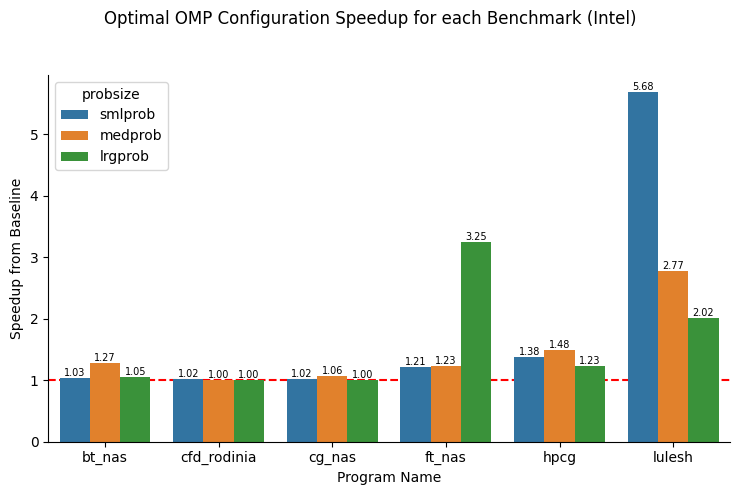

In [6]:
# we want to be able to plot the Ruby or Lassen Data on Ruby, so let's
# replace the path with the desired machine name
#makePlotForMachine('lassen')
makePlotForMachine('ruby')